In [ ]:
!pip install --upgrade scikit-learn
# 0.22.2.post1 -> 1.0
# import sklearn
# print(sklearn.__version__)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from pprint import pprint

## for Kaggle notebook
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


     |████████████████████████████████| 23.2 MB 52.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pwd
## Kaggle
# !ls ../input

## Colab
# !wget 'https://wenzhan1o-my.sharepoint.com/:u:/g/personal/ievtt_kze_me/EagIcOFamPlHgERo56QclZYB20V0UhmNJTVXRpXk_bXqTQ?e=veLGfV&download=1' -O titanic.zip
!wget 'https://bit.ly/3aODbKl' -O titanic.zip
!unzip -n titanic.zip


/content
--2021-11-03 09:12:44--  https://bit.ly/3aODbKl
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://wenzhan1o-my.sharepoint.com/:u:/g/personal/ievtt_kze_me/EagIcOFamPlHgERo56QclZYB20V0UhmNJTVXRpXk_bXqTQ?e=veLGfV&download=1 [following]
--2021-11-03 09:12:44--  https://wenzhan1o-my.sharepoint.com/:u:/g/personal/ievtt_kze_me/EagIcOFamPlHgERo56QclZYB20V0UhmNJTVXRpXk_bXqTQ?e=veLGfV&download=1
Resolving wenzhan1o-my.sharepoint.com (wenzhan1o-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to wenzhan1o-my.sharepoint.com (wenzhan1o-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/ievtt_kze_me/Documents/Study/Kaggle/Titanic/titanic.zip [following]
--2021-11-03 09:12:45--  https://wenzhan1o-my.sharepoint.com/personal/ievtt_kze_me/Documents/Study/Kaggle/Titan

In [ ]:
## Kaggle Notebook
# data_path = '../input/titanic/'
## Colab
data_path = './'

df_train = pd.read_csv(data_path + 'train.csv')
df_target = pd.read_csv(data_path + 'test.csv')

gender_sub = pd.read_csv(data_path + 'gender_submission.csv')

print(df_train.head(3))
pprint(df_train.head(3))
display(df_train.head(3))

print(df_train.info())
print(df_target.head(3))
print(df_target.info())


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.

In [ ]:
# 統計量情報
display(df_train.describe())
display(df_target.describe())

display(df_train.nunique(dropna=False))


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [ ]:
# 欠損データ
def kesson_table(df):
    nul_val = df.isnull().sum()
    nul_val = nul_val[nul_val > 0]
    kesson_table = pd.concat([nul_val,100 * nul_val / len(df)],axis=1)
    return(kesson_table.rename(columns={0:'欠損数',1:'%'}))

display(kesson_table(df_train))
display(kesson_table(df_target))

,欠損数,%
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


,欠損数,%
Age,86,20.574163
Fare,1,0.239234
Cabin,327,78.229665


* PassengerId – 乗客識別ユニークID
* Survived – 生存フラグ（0=死亡、1=生存）
* Pclass – チケットクラス
    * 1 = 上層クラス（お金持ち）
    * 2 = 中級クラス（一般階級）
    * 3 = 下層クラス（労働階級）
* Name – 乗客の名前
* Sex – 性別（male=男性、female＝女性）
* Age – 年齢
* SibSp – タイタニックに同乗している兄弟/配偶者の数
* Parch – タイタニックに同乗している親/子供の数
* Ticket – チケット番号
* Fare – 料金
* Cabin – 客室番号
* Embarked – 出港地（タイタニックへ乗った港）
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton


Kaggle(35) - タイタニックをRandom Forestで予測 - 連続変数のビニング２ - PythonとRPAで遊ぶ  
https://ailog.site/2021/03/13/2021/0313/

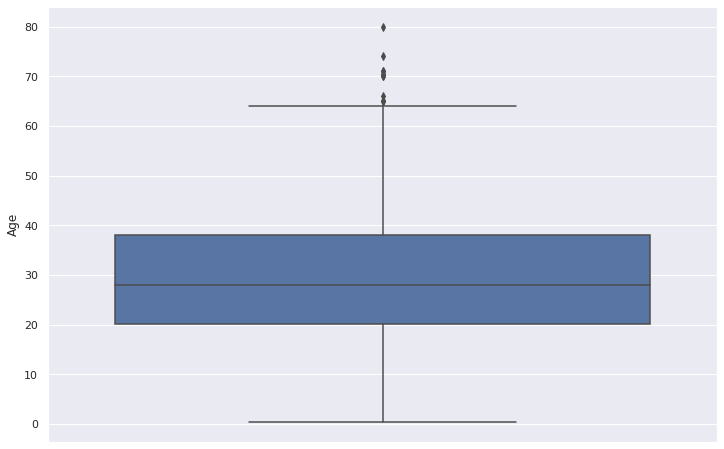

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, y='Age')

2.0    230
3.0    155
1.0    115
4.0     86
0.0     64
5.0     42
6.0     22
Name: AgeGroup, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0


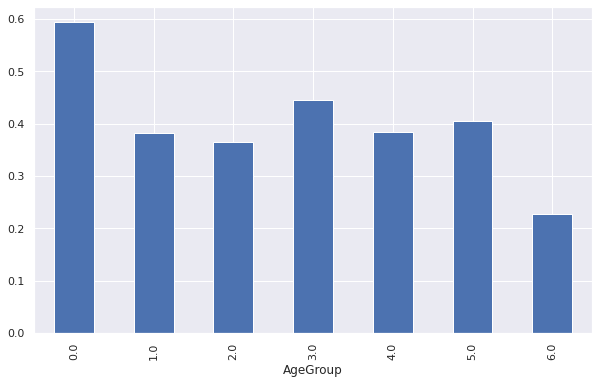

In [ ]:
# 指定数に分割 → テストデータの変換に難
df_train['AgeGroup'] = pd.cut(df_train['Age'], 5, labels=False)
# 指定範囲で分割
df_train['AgeGroup'] = pd.cut(df_train['Age'], [0,10,20,30,40,50,60,100], labels=False)

display(df_train['AgeGroup'].value_counts())
display(df_train.head())
df_train.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', figsize=(10,6))


In [ ]:

display(df_train[df_train['AgeGroup']==0.0].head(3))
display(df_train[df_train['AgeGroup']==5.0].head(3))
display(df_train[df_train['AgeGroup']==6.0].head(3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S,0.0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,0.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,5.0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,5.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,6.0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,6.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,6.0


## PipeLine

ColumnTransformerで特徴ごとに異なる変換を行うパイプラインを構築する | DevelopersIO  
https://dev.classmethod.jp/articles/how_to_use_columntransformer_sklearn/

scikit-learnのpipelineモジュールで機械学習パイプラインを作る | DevelopersIO  
https://dev.classmethod.jp/articles/create_pipeline_scikit-learn_pipeline/

Python: scikit-learn の Pipeline を使ってみる - CUBE SUGAR CONTAINER  
https://blog.amedama.jp/entry/2018/07/07/223257

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# Pipeline
# 

df_train = pd.read_csv(data_path + 'train.csv')
df_target = pd.read_csv(data_path + 'test.csv')

# カラムの型を確認
display(df_train)

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 891 entries, 0 to 890
# Data columns (total 12 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   PassengerId  891 non-null    int64  
#  1   Survived     891 non-null    int64  
#  2   Pclass       891 non-null    int64  
#  3   Name         891 non-null    object 
#  4   Sex          891 non-null    object 
#  5   Age          714 non-null    float64
#  6   SibSp        891 non-null    int64  
#  7   Parch        891 non-null    int64  
#  8   Ticket       891 non-null    object 
#  9   Fare         891 non-null    float64
#  10  Cabin        204 non-null    object 
#  11  Embarked     889 non-null    object 
# dtypes: float64(2), int64(5), object(5)
# memory usage: 83.7+ KB

## 欠損値の確認
# print(df_train.isnull().sum())

## 特徴と推定対象に分離
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

X_target = df_target

## 欠損値の確認
print(X.isnull().sum()[X.isnull().sum() > 0])
# Age         177
# Embarked      2
print(X_target.isnull().sum()[X_target.isnull().sum() > 0])
# Age    86

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 前処理
# 必要な特徴量はすべて記載する

# そのまま使用
pass_features = ['SibSp', 'Parch']
# 平均値で補完/StandardScaler
# numeric_features = ["SibSp", "Parch"]
# 最頻値で補完/ohe
cat_features = ['Pclass','Sex','Embarked']
age_feature = ['Age']


# 最頻値で補完/ohe

# 前処理(そのまま使用)
# 最低限 fit, transform メソッドが必要
class PassPreprocessor(object):
    def fit(self, X, y):
        # 学習フェーズ
        return self
    def transform(self, X):
        # 変換フェーズ
        return X
    def predict(self, X):
        # 分類フェーズ
        return X

# 前処理(AgeGrouop用)
class AgeGroupPreprocessor(object):
    def fit(self, X, y):
        # 学習フェーズ
        return self
    def transform(self, X):
        # 変換フェーズ
        # display(X[:5])
        # Binningのため一旦Seriesに変換
        df = pd.DataFrame(X,columns=['Age'])
        # display(X.shape)
        # display(df.head())
        # 範囲を指定してBinning
        # 範囲指定は0-10/-20/-30/-40/-50/-60/-100
        df['Age'] = pd.cut(df['Age'], [0,10,20,30,40,50,60,100], labels=False)
        # display(df.head())
        X2 = df['Age'].to_numpy()
        # display(X2.reshape([-1,1])[:5])
        return X2.reshape([-1,1])
    def predict(self, X):
        # 分類フェーズ
        return X


# そのまま使用
pass_transformer = Pipeline(steps=[
    ('pass', PassPreprocessor())])

# 数値用/標準化
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# カテゴリー変数用/最頻値で欠損補完/ohe
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Age用/平均値で補完/ビニング～ohe
# Sex：One-hotエンコーディング
age_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('agegroup', AgeGroupPreprocessor()),
    ('onehot2', OneHotEncoder(handle_unknown='ignore'))
    ])

# 前処理3
# Age：欠損値補完
categorical_transformer3 = Pipeline(steps=[
    ('cat_imputer3', SimpleImputer(strategy='mean'))])

# ColumnTransformerの作成
preprocessor = ColumnTransformer(
    transformers=[
        # ('num', numeric_transformer, numeric_features),
        ('pass', pass_transformer, pass_features),
        ('cat', categorical_transformer,cat_features),
        ('age', age_transformer, age_feature)
        ])

# 全体のパイプラインの作成
pipe = Pipeline([("preprocessor", preprocessor),
                 ("RF", RandomForestClassifier())
                #  ("Classifier", HistGradientBoostingClassifier())
])

set_config(display='diagram')   
pipe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Age         177
Cabin       687
Embarked      2
dtype: int64
Age       86
Fare       1
Cabin    327
dtype: int64


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pass',
                                                  Pipeline(steps=[('pass',
                                                                   <__main__.PassPreprocessor object at 0x7f472c2bba90>)]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('age',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('agegroup',
                                                                   <__main__.AgeGroupPreprocessor object at 0x7f47262a5450>),
                                                                  ('onehot2',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('RF', RandomForestClassifier())])

|正解/予測|True|False|
|---------|----|-----|
|True     |TP  |FN   |
|False    |FP  |TN   |

$$
\hat{y} = ax
$$

$$正解率=\frac{TP+TN}{TP+FP+FN+TN}$$


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

## 訓練データで性能を確認


pipe.fit(X_train,y_train)
display(X.head(10))
X_transform = preprocessor.fit_transform(X)
print('SibSp,Parch,Pclass(1,2,3),Sex(male,female),Embarked(B,S,C),Age(0,10,20,30,40,50,60,100)')
display(X_transform[:10])

y_pred = pipe.predict(X_test)

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

print('f1 score : ',f1_score(y_test, y_pred, average="micro"))
print('accuracy : ',accuracy_score(y_test, y_pred))
print('recall   : ',accuracy_score(y_test, y_pred))
print('precision: ',precision_score(y_test, y_pred))



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


SibSp,Parch,Pclass(1,2,3),Sex(male,female),Embarked(B,S,C),Age(0,10,20,30,40,50,60,100)


array([[1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [3., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 2., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.]])

f1 score :  0.8116591928251121
accuracy :  0.8116591928251121
recall   :  0.8116591928251121
precision:  0.8051948051948052


sklearnの交差検証の種類とその動作 - Qiita  
https://qiita.com/chorome/items/54e99093050a[[[]]9473a189

In [ ]:
## K-Fold(分割)
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
print(X.shape,y.shape)
for train_index, test_index in kf.split(X_transform, y.values.ravel()):
    print("train_index:", train_index[:5], "test_index:", test_index[:5])

## StratifiedKFold（層状K分割）
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X_transform, y.values.ravel()):
    print("train_index:", train_index[:5], "test_index:", test_index[:5])


## 交差検証
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, 
                         X, 
                         y, 
                         cv=5,
                         scoring='f1')
print(scores)

(891, 11) (891,)
train_index: [179 180 181 182 183] test_index: [0 1 2 3 4]
train_index: [0 1 2 3 4] test_index: [179 180 181 182 183]
train_index: [0 1 2 3 4] test_index: [357 358 359 360 361]
train_index: [0 1 2 3 4] test_index: [535 536 537 538 539]
train_index: [0 1 2 3 4] test_index: [713 714 715 716 717]
train_index: [440 443 444 445 446] test_index: [0 1 2 3 4]
train_index: [0 1 2 3 4] test_index: [440 443 444 445 446]
[0.64       0.73282443 0.7480916  0.67226891 0.74603175]


## 交差検証(cross_validate)

cross_val_scoreはもうやめようね。一発で交差検証するにはcross_validateを使う - 静かなる名辞  
https://www.haya-programming.com/entry/2018/03/31/184557  
Python: scikit-learn の cross_validate() 関数で独自の評価指標を計算する - CUBE SUGAR CONTAINER  
https://blog.amedama.jp/entry/sklearn-cv-custom-metric


In [ ]:
from pprint import pprint
from sklearn.model_selection import cross_validate, StratifiedKFold

# モデルを用意する
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified k-Fold で汎化性能を評価する
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 評価する指標
score_funcs = [
    'accuracy',
    'precision',
    'recall',
    'f1',
]
# Cross Validation で検証する
scores = cross_validate(pipe, X, y, cv=skf, scoring=score_funcs)
# 得られた指標を出力する
print('accuracy :', scores['test_accuracy'].mean())
print('precision:', scores['test_precision'].mean())
print('recall   :', scores['test_recall'].mean())
print('f1       :', scores['test_f1'].mean())

pprint(scores)

accuracy: 0.8170673529596385
precision: 0.8136652556457455
recall: 0.6813725490196079
f1: 0.7407036430496842
{'fit_time': array([0.19494128, 0.19869184, 0.19143438, 0.19288349, 0.19591975]),
 'score_time': array([0.03026891, 0.03003478, 0.028934  , 0.02983832, 0.03001142]),
 'test_accuracy': array([0.81005587, 0.83146067, 0.78651685, 0.82022472, 0.83707865]),
 'test_f1': array([0.73015873, 0.76190476, 0.69354839, 0.75757576, 0.76033058]),
 'test_precision': array([0.80701754, 0.82758621, 0.76785714, 0.78125   , 0.88461538]),
 'test_recall': array([0.66666667, 0.70588235, 0.63235294, 0.73529412, 0.66666667])}


In [ ]:
y_pred = pipe.predict(X_test)

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

print('f1 score : ',f1_score(y_test, y_pred, average="micro"))
print('accuracy : ',accuracy_score(y_test, y_pred))
print('recall   : ',accuracy_score(y_test, y_pred))
print('precision: ',precision_score(y_test, y_pred))

print(y_pred)

f1 score :  0.8116591928251121
accuracy :  0.8116591928251121
recall   :  0.8116591928251121
precision:  0.8051948051948052
[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 0]


In [ ]:
from IPython.display import FileLink
my_prediction = pipe.predict(X_target)

print(my_prediction)
# PassengerIdを取得
PassengerId = np.array(X_target['PassengerId']).astype(int)
# my_predistionとPassengerIdをデータフレームに落とし込む
my_solution = pd.DataFrame(my_prediction,PassengerId,columns=['Survived'])
# my_tree_one.csvとして書き出し
my_solution.to_csv('titanic_pred_2.csv' ,index_label=['PassengerId'])
FileLink('my_tree_one.csv' )
print(my_solution.head(3))

# !zip -r file.zip 'titanic_pred_2.csv' 

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]
     Survived
892         0
893         0
894         0
